In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('EV_part1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   County            3174 non-null   object
 1   City              3174 non-null   object
 2   Model Year        3174 non-null   int64 
 3   Maker             3174 non-null   object
 4   Model             3174 non-null   object
 5   EV Type           3174 non-null   object
 6   CAFV Eligibility  3174 non-null   object
 7   Electric Range    3174 non-null   int64 
 8   Electric Utility  3174 non-null   object
dtypes: int64(2), object(7)
memory usage: 223.3+ KB


In [2]:
df.head()

,County,City,Model Year,Maker,Model,EV Type,CAFV Eligibility,Electric Range,Electric Utility
0,Snohomish,Bothell,2016,AUDI,A3,PHEV,Not eligible,16,PSE INC
1,Kitsap,Bainbridge Island,2016,AUDI,A3,PHEV,Not eligible,16,PSE INC
2,Kitsap,Bremerton,2016,AUDI,A3,PHEV,Not eligible,16,PSE INC
3,Thurston,Olympia,2016,AUDI,A3,PHEV,Not eligible,16,PSE INC
4,Thurston,Rochester,2016,AUDI,A3,PHEV,Not eligible,16,PSE INC


Text(0.5, 0, 'Electric Range')

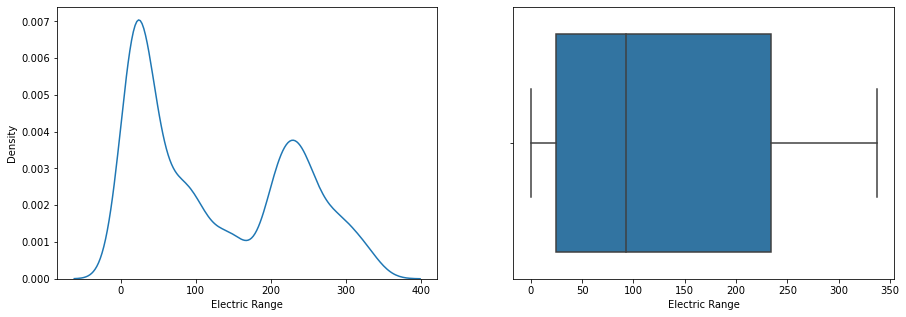

In [3]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="Electric Range")
plt.xlabel('Electric Range')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Electric Range")
plt.xlabel('Electric Range')

In [4]:
df['Electric Range'].describe()

count    3174.000000
mean      126.411468
std       103.901734
min         0.000000
25%        25.000000
50%        93.000000
75%       234.000000
max       337.000000
Name: Electric Range, dtype: float64

In [5]:
df['Electric Range'].median()

93.0

In [6]:
df['Electric Range'].mode()

0    238
dtype: int64

In [7]:
Q1 = df['Electric Range'].quantile(0.25)
Q3 = df['Electric Range'].quantile(0.75)
IQR = Q3 - Q1

mask = (df['Electric Range'] >= Q1 - 1.5 * IQR) & (df['Electric Range'] <= Q3 + 1.5 * IQR)
df = df[mask]
df.shape

(3174, 9)

Text(0.5, 0, 'Electric Range')

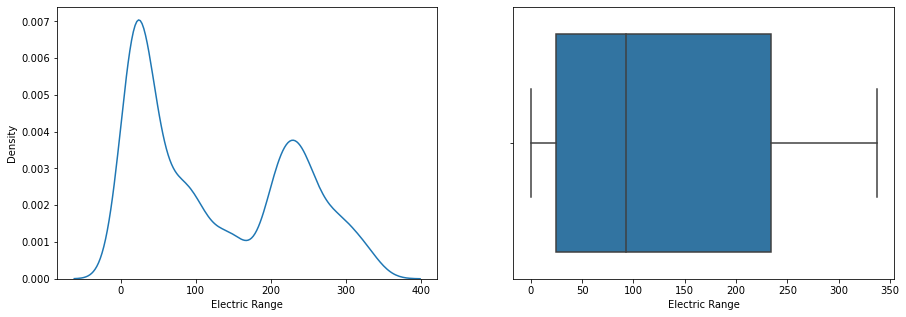

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="Electric Range")
plt.xlabel('Electric Range')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Electric Range")
plt.xlabel('Electric Range')

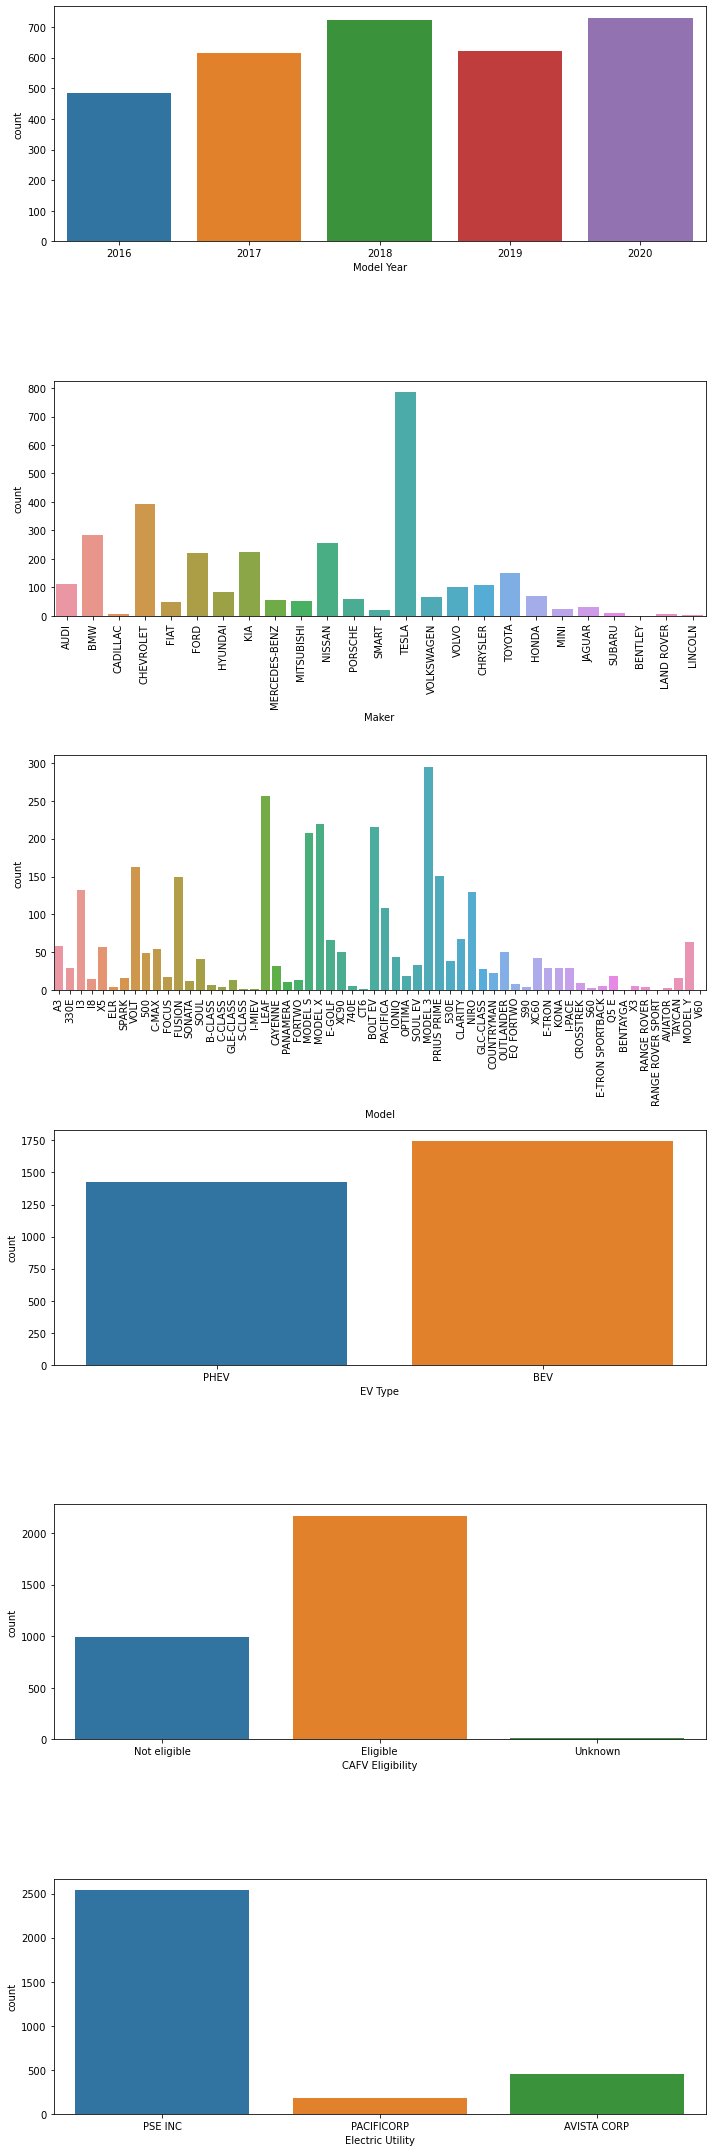

In [9]:
kategorik = ['Model Year', 'Maker', 'Model', 'EV Type',
       'CAFV Eligibility', 'Electric Utility']
       
features = kategorik       
plt.figure(figsize=(10, len(features)*5))

for i in range(0, len(features)):
    plt.subplot(len(features), 1, i+1)
    sns.countplot(x=df[features[i]])
    plt.xlabel(features[i])
    if features[i] == 'Maker' or features[i] =='Model':
       plt.xticks(rotation='vertical')  
    plt.tight_layout()

c:\Users\Try\anaconda3\envs\Panda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


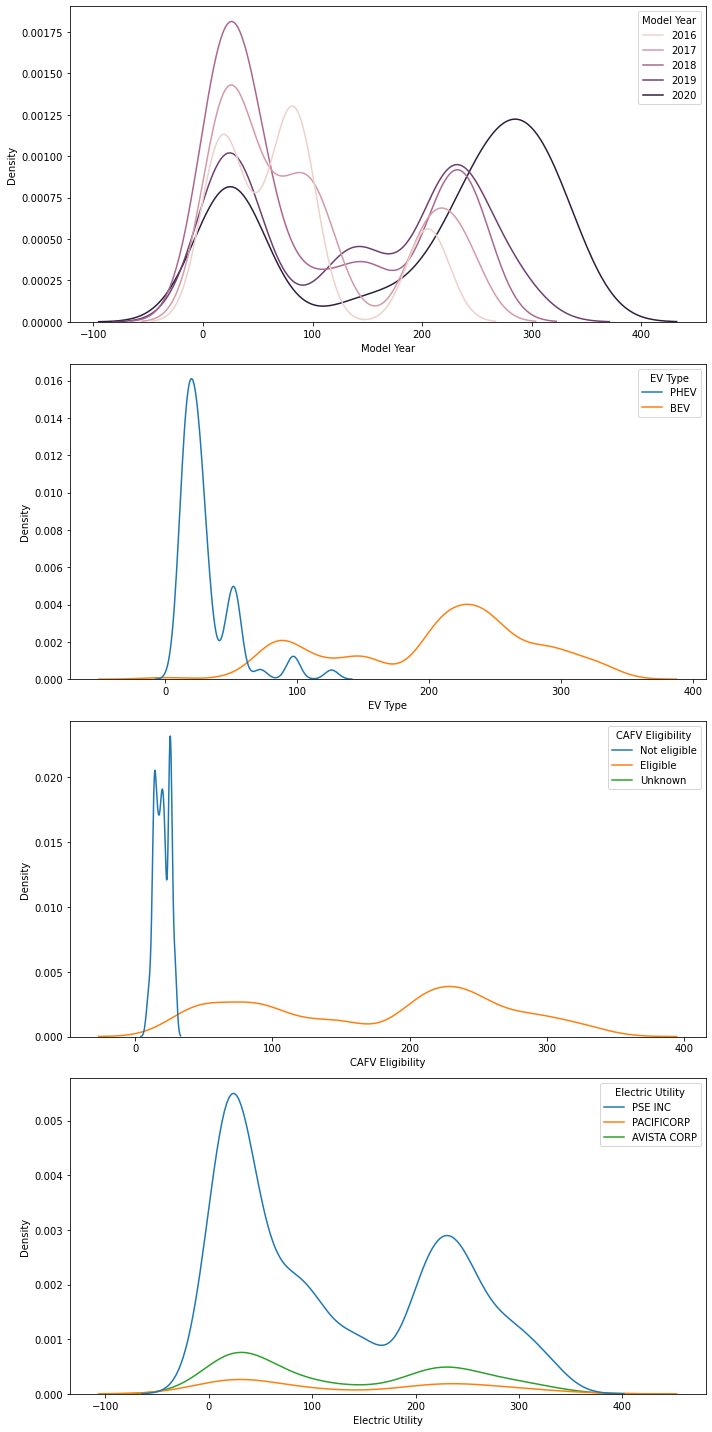

In [10]:
kategorik = ['Model Year', 'EV Type', 'CAFV Eligibility', 'Electric Utility']

features = kategorik
plt.figure(figsize=(10, len(features)*5))

for i in range(0, len(features)):
    plt.subplot(len(features), 1, i+1)
    sns.kdeplot(data=df, x='Electric Range', hue=features[i])
    plt.xlabel(features[i])  
    plt.tight_layout()

<AxesSubplot:xlabel='Model Year', ylabel='Electric Range'>

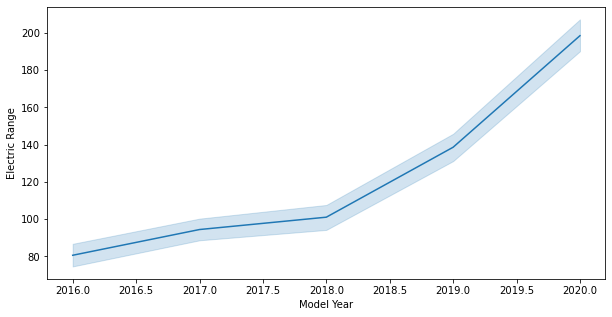

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Model Year', y='Electric Range')

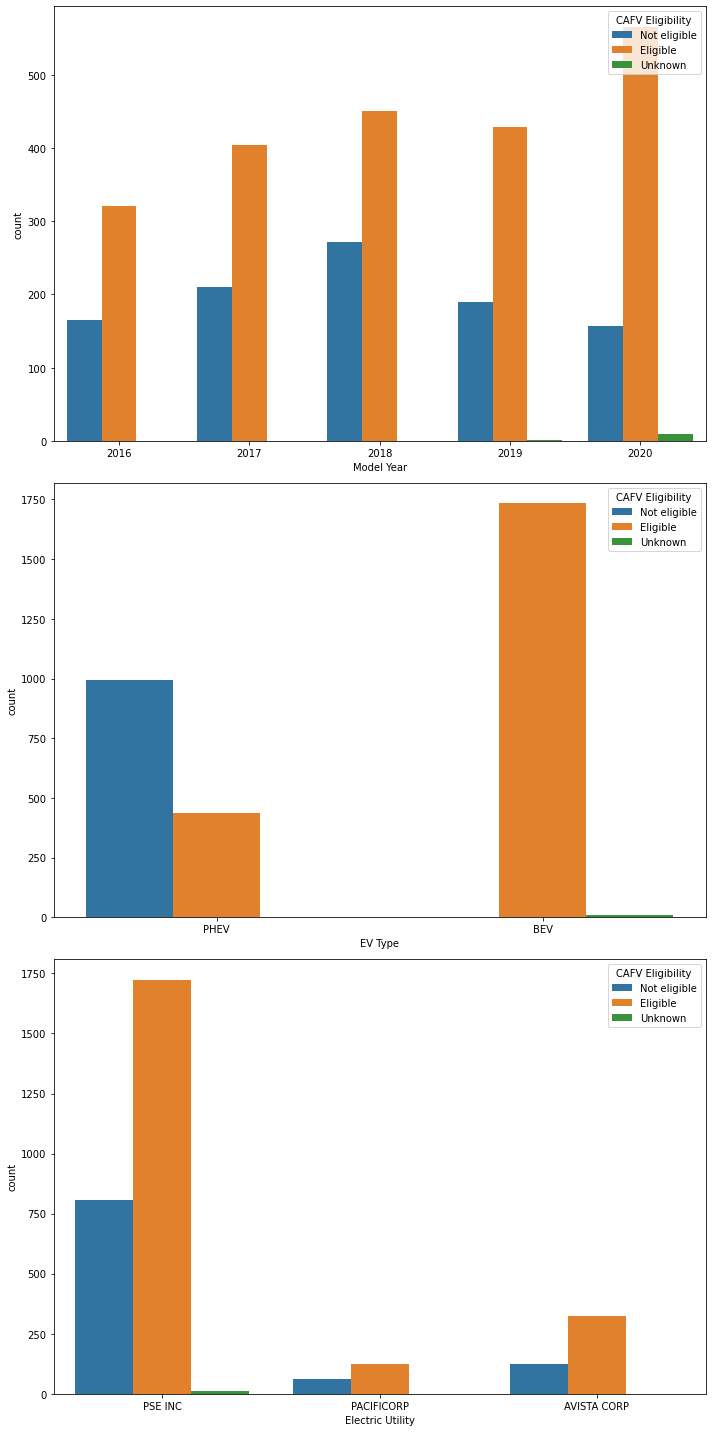

In [12]:
kategorik = ['Model Year', 'EV Type', 'Electric Utility']

features = kategorik
plt.figure(figsize=(10, 20))

for i in range(0, len(features)):
    plt.subplot(len(features), 1, i+1)
    sns.countplot(data=df, x=features[i], hue='CAFV Eligibility')
    plt.xlabel(features[i])  
    plt.tight_layout()

<AxesSubplot:>

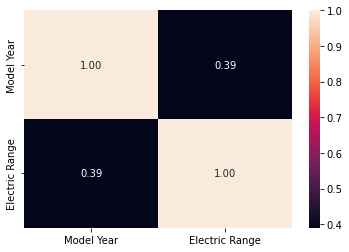

In [13]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")

In [14]:
df.to_csv('EV_part2.csv', index=False)